In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CarData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [39]:
df.carlength.value_counts()

157.3    15
188.8    11
186.7     7
166.3     7
171.7     7
         ..
157.1     1
181.5     1
191.7     1
180.3     1
158.8     1
Name: carlength, Length: 75, dtype: int64

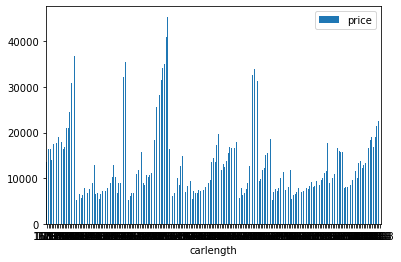

In [5]:
#visualisation
#Make bins of price and count it
ax = df.plot.bar(x='carlength', y='price', rot=0)
plt.show()

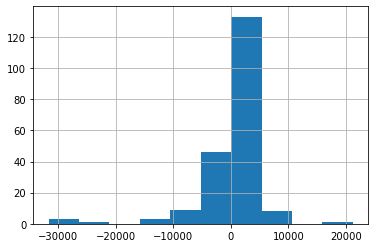

In [6]:
#make bins using replace
plt.figure();
df["price"].diff().hist();


In [7]:
 # to check  categorical variables
for i in df.columns:  
  print(i,df[i].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [8]:
df.drop(['car_ID','CarName'], axis=1, inplace=True)

In [9]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
df.replace({"fueltype":{"gas":0,"diesel":1}},inplace=True)

In [11]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [12]:
df.replace({"aspiration":{"std":0,"turbo":1}},inplace=True)

In [13]:
df.replace({"doornumber":{"two":0,"four":1}},inplace=True)

In [14]:
df.replace({"enginelocation":{"front":0,"rear":1}},inplace=True)

In [15]:
df=pd.get_dummies(df,columns=["carbody","drivewheel","enginetype","fuelsystem","cylindernumber"],drop_first=True)

In [16]:
df.head(4)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,1,0,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,0,0,0


In [17]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [18]:
#normalisation

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
X.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6,0.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,0.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.8,0.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Now check the assumptions for linear regression: should be linear indepenent,should'nt be multicollinear, should follow homoscedasticity

In [19]:
import seaborn as sns

In [20]:
# p=sns.pairplot(df)

In [21]:
import matplotlib.pyplot as plt

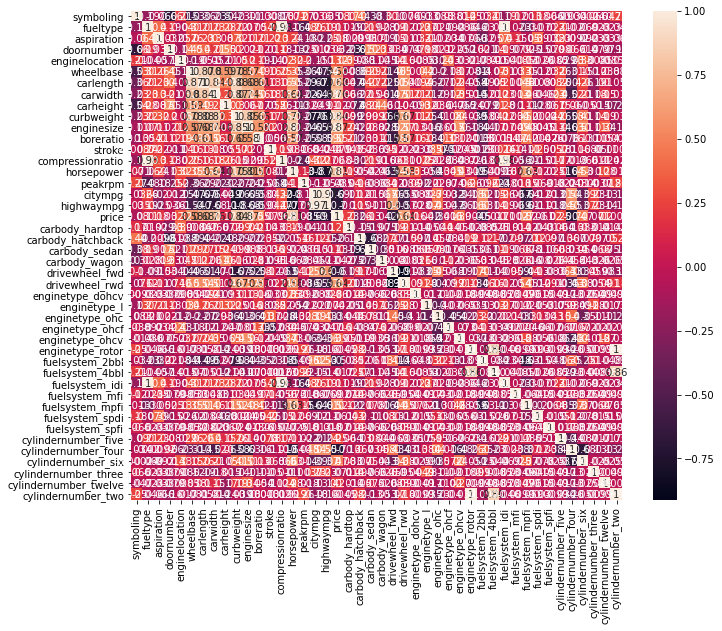

In [22]:
corrMatrix=df.corr()
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  ##removing multicollinear variables

In [24]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [25]:
calculate_vif_(X)

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'fueltype' at index: 1
dropping 'enginetype_rotor' at index: 28
dropping 'compressionratio' at index: 12
dropping 'highwaympg' at index: 15
dropping 'cylindernumber_four' at index: 34
dropping 'curbweight' at index: 8
dropping 'carlength' at index: 5
dropping 'horsepower' at index: 10
dropping 'carwidth' at index: 5
dropping 'enginesize' at index: 6
dropping 'boreratio' at index: 6
dropping 'carbody_sedan' at index: 11
dropping 'wheelbase' at index: 4
dropping 'stroke' at index: 5
dropping 'citympg' at index: 6
dropping 'drivewheel_fwd' at index: 9
dropping 'carheight' at index: 4
dropping 'symboling' at index: 0
dropping 'enginetype_ohc' at index: 10
dropping 'fuelsystem_mpfi' at index: 16
Remaining variables:
Index(['aspiration', 'doornumber', 'enginelocation', 'peakrpm',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl'

,aspiration,doornumber,enginelocation,peakrpm,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.0,0.0,0.0,0.346939,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.346939,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.346939,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.551020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.551020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,0.0,0.510204,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,1.0,1.0,0.0,0.469388,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,1.0,0.0,0.551020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203,1.0,1.0,0.0,0.265306,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
X=df[['aspiration', 'doornumber', 'enginelocation', 'peakrpm',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'cylindernumber_five', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve']]
y=df['price']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [43]:
X

,aspiration,doornumber,enginelocation,peakrpm,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_six,cylindernumber_three,cylindernumber_twelve
0,0,0,0,5000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,5000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,5500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,5500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,5400,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
201,1,1,0,5300,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,1,0,5500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,1,1,0,4800,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [44]:
X.shape

(205, 22)

In [45]:
y.shape

(205,)

In [46]:
import statsmodels.api as sm 

In [47]:
lm = sm.OLS(y_train,X_train).fit()

In [48]:
lm.summary()

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              77.69
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                    5.94e-60
Time:                        20:43:22   Log-Likelihood:                         -1396.0
No. Observations:                 143   AIC:                                      2832.
Df Residuals:                     123   BIC:                                      2891.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
aspiration             2536.6139   1255.017      2.021      0.045      52.384    5020.843
doornumber             3042.0856   1115.911      2.726      0.007     833.208    5250.963
enginelocation         2747.7433   5405.553      0.508      0.612   -7952.218    1.34e+04
peakrpm                   1.4743      0.218      6.772      0.000       1.043       1.905
carbody_hardtop        1.039e+04   3502.511      2.966      0.004    3456.654    1.73e+04
carbody_hatchback      -274.7550   1154.250     -0.238      0.812   -2559.523    2010.013
carbody_wagon         -1570.1971   1295.267     -1.212      0.228   -4134.099     993.704
drivewheel_rwd         7503.8438   1072.909      6.994      0.000    5380.087    9627.601
enginetype_dohcv       1.569e+04   4675.384      3.357      0.001    6439.808    2.49e+04
enginetype_l          -2685.0445   1948.516     -1.378      0.171   -6542.013    1171.924
enginetype_ohcf         545.0162   1992.915      0.273      0.785   -3399.837    4489.870
enginetype_ohcv        7101.4189   1902.060      3.734      0.000    3336.407    1.09e+04
fuelsystem_2bbl       -1676.5449   1004.467     -1.669      0.098   -3664.825     311.736
fuelsystem_4bbl       -2429.6210   4676.072     -0.520      0.604   -1.17e+04    6826.378
fuelsystem_idi         -365.9553   1673.541     -0.219      0.827   -3678.628    2946.717
fuelsystem_mfi         3.596e-12   3.06e-12      1.175      0.242   -2.46e-12    9.65e-12
fuelsystem_spdi       -1373.5393   2159.063     -0.636      0.526   -5647.271    2900.193
fuelsystem_spfi       -3552.3656   4677.118     -0.760      0.449   -1.28e+04    5705.702
cylindernumber_five    8971.4048   2160.174      4.153      0.000    4695.473    1.32e+04
cylindernumber_six     3393.6309   1562.230      2.172      0.032     301.292    6485.969
cylindernumber_three           0          0        nan        nan           0           0
cylindernumber_twelve  1.402e+04   5018.478      2.794      0.006    4089.692     2.4e+04
==============================================================================
Omnibus:                       28.339   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.540
Skew:                           0.772   Prob(JB):                     2.92e-16
Kurtosis:                       6.102   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that t

In [35]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def homoscedasticity_assumption(model, features, label):
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=1)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(True) 
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

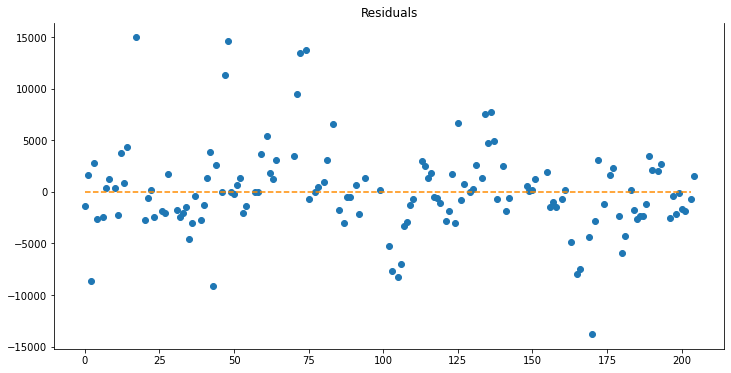

In [36]:
homoscedasticity_assumption(lm, X_train, y_train)

In [37]:
lm.predict(X_test)

15     21901.883509
9      19344.196776
100     9024.797257
132     7478.921848
68     26541.887087
           ...     
56     13645.000000
128    22903.440836
76      6163.259721
144     8982.661761
104    25399.249779
Length: 62, dtype: float64